1. Acquisition

On installe les modules python

In [10]:
%pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install pandas kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importation de l'ensemble de données de grande taille sur les voitures 

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("makslypko/large-cars-dataset")

print("Path to dataset files:", path)

C:\Users\izima\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\izima\.cache\kagglehub\datasets\makslypko\large-cars-dataset\versions\1


Liste des fichiers importables

In [13]:
!dir {path}

 Le volume dans le lecteur C s'appelle Windows-SSD
 Le num�ro de s�rie du volume est 6034-6E9B

 R�pertoire de C:\Users\izima\.cache\kagglehub\datasets\makslypko\large-cars-dataset\versions\1

11/06/2025  14:57    <DIR>          .
11/06/2025  14:57    <DIR>          ..
11/06/2025  14:57            39�010 Large Cars Dataset.csv
               1 fichier(s)           39�010 octets
               2 R�p(s)  295�892�963�328 octets libres


Importation des données avec pandas


In [14]:
import pandas as pd
import os

data = pd.read_csv(os.path.join(path, "large cars dataset.csv"))

On affiche les première lignes

In [15]:
data.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


2. Data Wrangling

Détection des données manquantes

In [16]:
# Afficher le nombre de valeurs manquantes par colonne
data.isnull()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
425,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Comptabilision le nombre de valeurs manquantes par variable

In [17]:
data.isnull().sum()

Brand           0
Model           0
VehicleClass    0
Region          0
DriveTrain      0
MSRP            0
DealerCost      0
EngineSize      0
Cylinders       2
HorsePower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

Regardons la fin des données

In [18]:
data.tail()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


Suppression des lignes contenant les valeurs mamquantes

In [19]:
clean = data.dropna()

Regardons les correlations

In [20]:
# Calcul et affichage de la matrice de corrélation pour les variables numériques du DataFrame clean
correlation_matrix = clean.corr(numeric_only=True)
correlation_matrix

,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
HorsePower,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


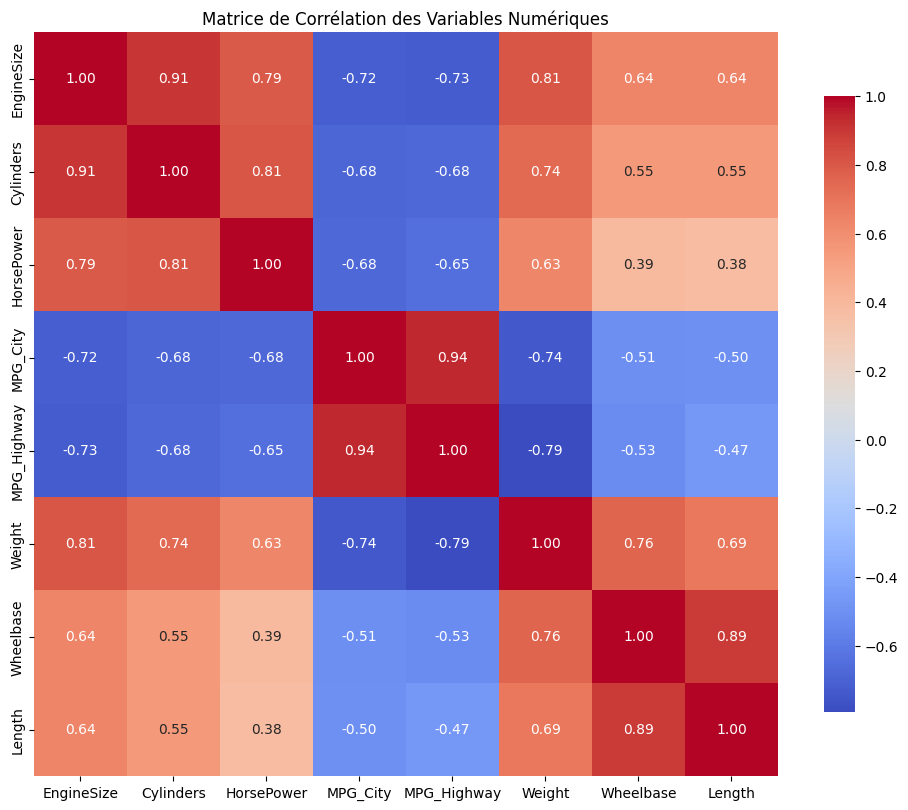

In [21]:
from seaborn import heatmap
import matplotlib.pyplot as plt
# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 10))    
heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de Corrélation des Variables Numériques")    
plt.show()
# Afficher les types de données de chaque colonne


Regardons la corrélation entre Brand et Région

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\izima\AppData\Local\Temp\ipykernel_25960\3224871088.py:12: SyntaxWarning: invalid escape sequence '\$'
  filtered['DealerCost'] = filtered['DealerCost'].replace('[\$,]', '', regex=True).astype(float)


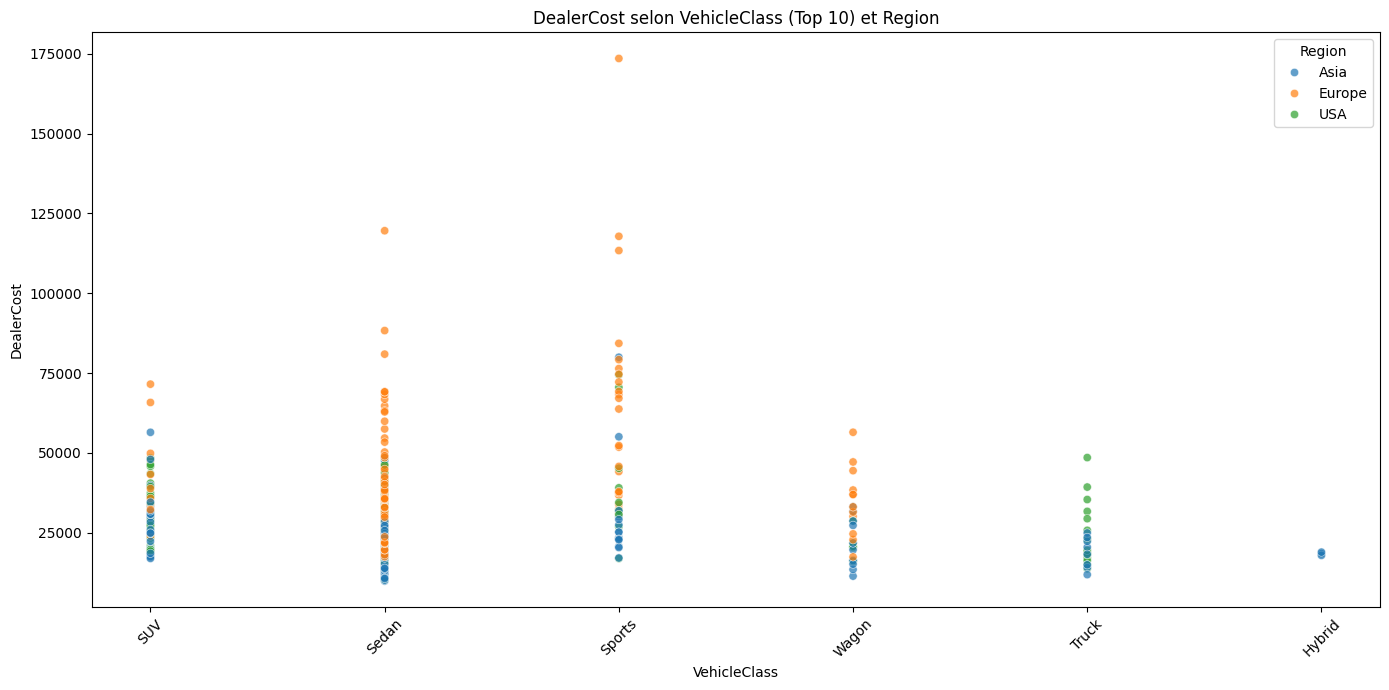

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Sélectionner les 10 VehicleClass les plus fréquents
top_classes = clean['VehicleClass'].value_counts().nlargest(10).index

# Filtrer le DataFrame pour ne garder que ces classes
filtered = clean[clean['VehicleClass'].isin(top_classes)].copy()

# Nettoyer la colonne DealerCost pour la convertir en float
filtered['DealerCost'] = filtered['DealerCost'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(14, 7))
sns.scatterplot(data=filtered, x='VehicleClass', y='DealerCost', hue='Region', alpha=0.7)
plt.title("DealerCost selon VehicleClass (Top 10) et Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Le graphique présente la répartition du coût concessionnaire (DealerCost) en fonction des dix classes de véhicules les plus fréquentes, différenciées par région. 
    On observe que certaines classes, telles que les SUV et les Sports, affichent généralement des coûts plus élevés, tandis que les Wagons et les Hybrides tendent à avoir des coûts plus faibles.
La dispersion des points suggère une variabilité importante du coût au sein d'une même classe, probablement liée à la diversité des modèles.
    Enfin, la couleur des points indique que certaines régions, notamment l'Europe et l'Asie, sont bien représentées dans plusieurs classes, ce qui permet de comparer les tendances régionales pour chaque type de véhicule.

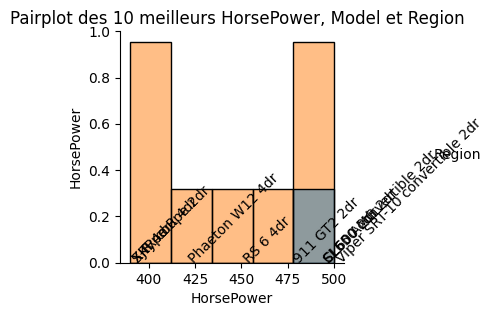

In [28]:
import seaborn as sns

# Sélectionner les 10 voitures avec le plus de HorsePower
top_hp = clean.nlargest(10, 'HorsePower')

import matplotlib.pyplot as plt

# Pairplot avec Model comme label et Region comme couleur
sns.pairplot(top_hp, vars=['HorsePower'], hue='Region', diag_kind='hist', markers='o', height=3)
for i, label in enumerate(top_hp['Model']):
    plt.gca().annotate(label, (top_hp['HorsePower'].iloc[i], 0), rotation=45)
plt.suptitle("Pairplot des 10 meilleurs HorsePower, Model et Region", y=1.02)
plt.show()

Le graphique met en évidence la distribution du coût concessionnaire (DealerCost) pour les dix classes de véhicules les plus représentées, en distinguant les régions par couleur.
On observe que certaines classes, comme les SUV et les Sports, présentent généralement des coûts plus élevés, tandis que les Wagons et les Hybrides affichent des coûts plus faibles.
La dispersion des points au sein d'une même classe indique une variabilité importante des coûts, probablement liée à la diversité des modèles proposés.
Enfin, la répartition des couleurs montre que plusieurs régions, notamment l'Europe et l'Asie, sont bien représentées dans différentes classes, ce qui permet de comparer les tendances régionales pour chaque type de véhicule.